In [ ]:
학습목표 : 시계열 데이터중, 자기상관함수(ACF)를 통해 외부요인이 얼마나 지속되는지 검토한다. 
    (마케팅 활동 효과가 몇주간 지속되는지?, 이번주 진행한 마케팅 활동이 얼마나 지속되는지, 혹은 외부 충격이 얼마나 지속되는지에 대한 인사이트 도출가능)
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')
df.columns=["KOUS"]
df['KOUS'].replace('.', '', inplace=True)
df['KOUS'] = pd.to_numeric(df['KOUS'])
df.fillna(method='ffill', inplace=True)

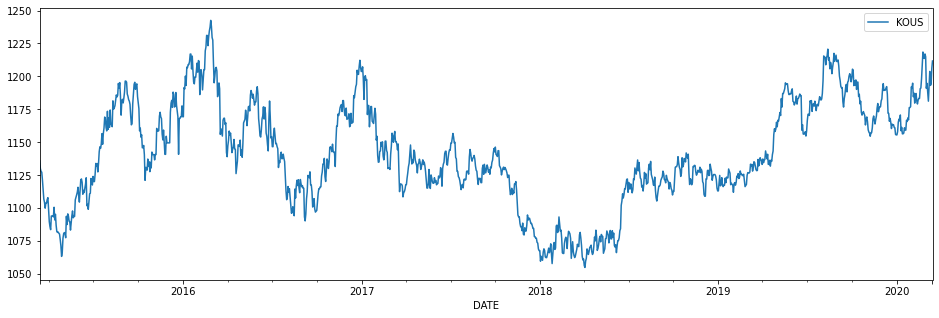

In [3]:
#연도별 

df.plot(figsize=(16,5))


In [4]:
#주단위로 데이터
df_w = df.resample('W-Fri').last()

In [5]:
#2017과 2019년 데이터만 추출
df_2017 = df_w[df_w.index.year==2017]
df_2019 = df_w[df_w.index.year==2019]


In [6]:
df_2019.tail()

,KOUS
DATE,
2019-11-29,1181.33
2019-12-06,1189.86
2019-12-13,1171.97
2019-12-20,1160.30
2019-12-27,1160.87


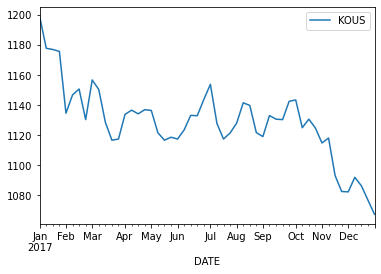

In [7]:
df_2017.plot()

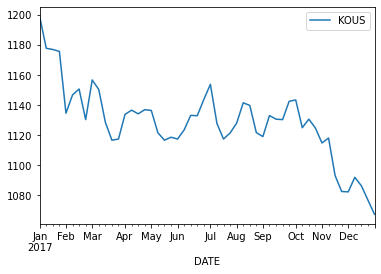

In [8]:
df_2017.plot()

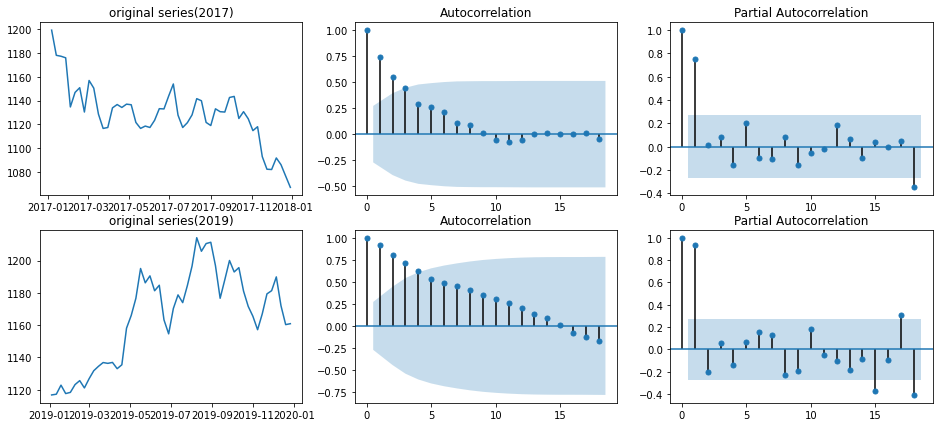

In [9]:
# 첫번째 행 : 2017년 데이터의 원계열, ACF, PACF
# 두번째 행 : 2019년 데이터의 원계열, ACF, PACF 
#전체 ACF, PACF 분석 그래프를 모아서 보기 

figure, axes = plt.subplots(2,3, figsize = (16,7))
axes[0,0].plot(df_2017)
axes[0,0].set_title('original series(2017)')
axes[1,0].plot(df_2019)
axes[1,0].set_title('original series(2019)')
#ACF 의 경우, 파라미터로 열과 행을 지정해준다. 
plot_acf(df_2017, ax=axes[0,1])
plot_acf(df_2019, ax=axes[1,1])
plot_pacf(df_2017, ax=axes[0,2])
plot_pacf(df_2019, ax=axes[1,2])
plt.show()

In [ ]:
#결과 보고서
ACF_2017 그래프를 살펴보면 약 3주간 외부 충격이 오래 지속되었으며, 2019년도는 4주간 외부충격이 지속되었다. 
PACF 그래프를 보면, 2017년에는 외부충격이 다음기에 0.75남아있지만, 2019년에는 0.9남아 있다.
즉, persistency가 증가하고 있다.

ACF 자기상환함수는 다음과 같은 분석에 사용할 수 있다. 
-> 가입자, 사용자 마케팅 효과 분석
--> 주가지수, 환율 : 외부 충격이 얼마나 오래 지속되는가. 